# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
df = pd.read_csv("heart_disease_cleaned.csv")

print("Dataset shape:", df.shape)
df.head(10)

Dataset shape: (303, 26)


,age,trestbps,chol,thalach,oldpeak,ca,sex_0.0,sex_1.0,cp_1.0,cp_2.0,...,restecg_2.0,exang_0.0,exang_1.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0,target
0,0.948726,0.757525,-0.264900,0.017197,1.087338,-0.711131,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,1.392002,1.611220,0.760415,-1.821905,0.397182,2.504881,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1.432877,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,-0.711131,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,-0.711131,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
5,0.172994,-0.665300,-0.206864,1.243266,-0.206705,-0.711131,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
6,0.837908,0.472960,0.412195,0.455079,2.208842,1.432877,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
7,0.283813,-0.665300,2.075914,0.586443,-0.379244,-0.711131,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0
8,0.948726,-0.096170,0.141357,-0.114167,0.310912,0.360873,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
9,-0.159462,0.472960,-0.845268,0.236138,1.777495,-0.711131,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1


In [3]:
label_col = "target"
X = df.drop(columns=[label_col])
y = df[label_col]

print("Features shape:", X.shape)
print("-------------------")
print("Target distribution:\n", y.value_counts())

Features shape: (303, 25)
-------------------
Target distribution:
 target
0    164
1    139
Name: count, dtype: int64


# Apply PCA

In [4]:
# Apply PCA with all components
pca = PCA()
X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_

print("Explained variance ratio (first 10 components):")
print(explained_variance[:10])

Explained variance ratio (first 10 components):
[0.25707191 0.1321787  0.0979292  0.08786709 0.08244295 0.06091013
 0.0491615  0.04642918 0.03605895 0.03249308]


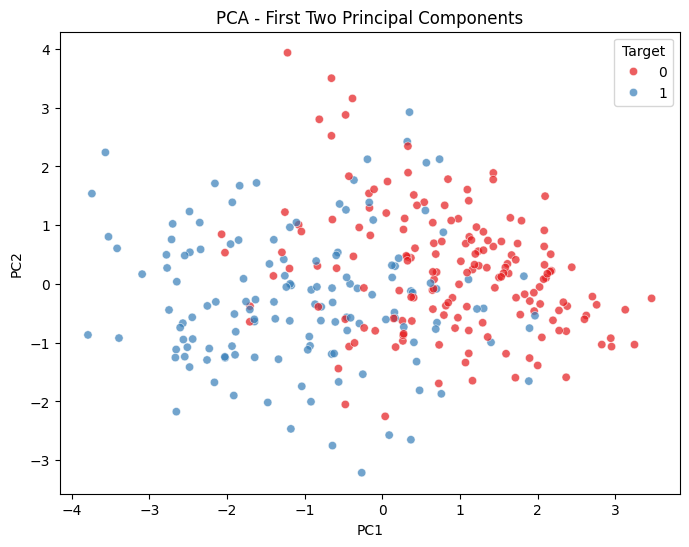

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=y, palette="Set1", alpha=0.7
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First Two Principal Components")
plt.legend(title="Target")
plt.show()

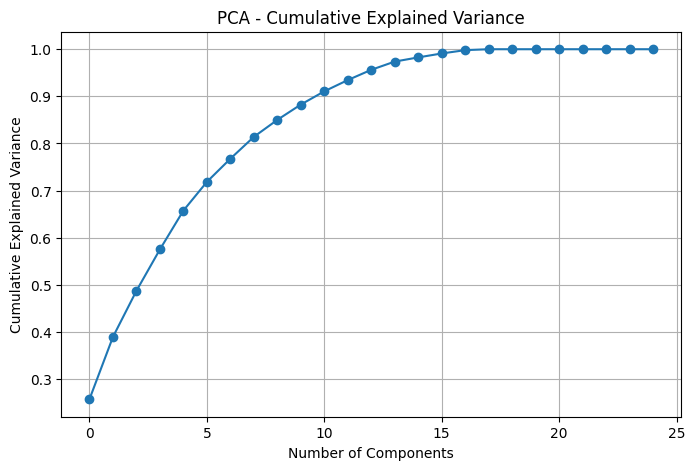

In [6]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [7]:
threshold = 0.95
n_components_95 = np.argmax(np.cumsum(explained_variance) >= threshold) + 1
print(f"Number of components to explain {threshold*100:.0f}% variance:", n_components_95)

# Transform dataset with reduced components
pca_reduced = PCA(n_components=n_components_95)
X_pca_reduced = pca_reduced.fit_transform(X)

print("Reduced feature matrix shape:", X_pca_reduced.shape)

Number of components to explain 95% variance: 13
Reduced feature matrix shape: (303, 13)


In [8]:
df_pca = pd.DataFrame(X_pca_reduced, columns=[f"PC{i+1}" for i in range(X_pca_reduced.shape[1])])
df_pca[label_col] = y.values

OUTPUT_CSV = "data/heart_disease_pca.csv"
df_pca.to_csv(OUTPUT_CSV, index=False)
print("PCA-reduced dataset saved to:", OUTPUT_CSV)

PCA-reduced dataset saved to: data/heart_disease_pca.csv


# Thanks